In [1]:
import pandas as pd
import numpy as np

In [33]:
df_train = pd.read_csv('./train_essays.csv')
df_test = pd.read_csv('./test_essays.csv')
df_prompt = pd.read_csv('./train_prompts.csv')

id - A unique identifier for each essay.
prompt_id - Identifies the prompt the essay was written in response to.
text - The essay text itself.
generated - Whether the essay was written by a student (0) or generated by an LLM (1). This field is the target and is not present in test_essays.csv.

In [34]:
df_train

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


In [56]:
df_train.generated.value_counts()

0    1375
1       3
Name: generated, dtype: int64

In [54]:
df_train.prompt_id.value_counts()

0    708
1    670
Name: prompt_id, dtype: int64

In [35]:
df_test

,id,prompt_id,text
0,0000aaaa,2,Aaa bbb ccc.
1,1111bbbb,3,Bbb ccc ddd.
2,2222cccc,4,CCC ddd eee.


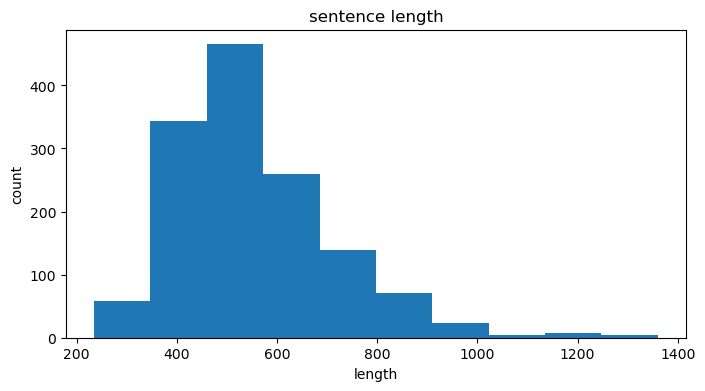

In [52]:
import matplotlib.pyplot as plt

sentence_length = [len(sentence_len) for sentence_len in df_train['text'].str.split()]

plt.figure(figsize=(8, 4))
plt.hist(sentence_length)
plt.title('sentence length')
plt.xlabel('length')
plt.ylabel('count')
plt.show()

prompt_id - A unique identifier for each prompt.
prompt_name - The title of the prompt.
instructions - The instructions given to students.
source_text - The text of the article(s) the essays were written in response to, in Markdown format. Significant paragraphs are enumerated by a numeral preceding the paragraph on the same line, as in 0 Paragraph one.\n\n1 Paragraph two.. Essays sometimes refer to a paragraph by its numeral. Each article is preceded with its title in a heading, like # Title. When an author is indicated, their name will be given in the title after by. Not all articles have authors indicated. An article may have subheadings indicated like ## Subheading.

In [6]:
df_prompt

,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [47]:
df_prompt['source_text'][0].split('#')

['',
 ' In German Suburb, Life Goes On Without Cars by Elisabeth Rosenthal\n\n1 VAUBAN, Germany—Residents of this upscale community are suburban pioneers, going where few soccer moms or commuting executives have ever gone before: they have given up their cars.\n\n2 Street parking, driveways and home garages are generally forbidden in this experimental new district on the outskirts of Freiburg, near the French and Swiss borders. Vauban’s streets are completely “car-free”—except the main thoroughfare, where the tram to downtown Freiburg runs, and a few streets on one edge of the community. Car ownership is allowed, but there are only two places to park—large garages at the edge of the development, where a car-owner buys a space, for $40,000, along with a home.\n\n3 As a result, 70 percent of Vauban’s families do not own cars, and 57 percent sold a car to move here. “When I had a car I was always tense. I’m much happier this way,” said Heidrun Walter, a media trainer and mother of two, as

In [36]:
new_df = pd.merge(left=df_train, right=df_prompt, how='inner', on='prompt_id')

In [37]:
new_df

,id,prompt_id,text,generated,prompt_name,instructions,source_text
0,0059830c,0,Cars. Cars have been around since they became ...,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,005db917,0,Transportation is a large necessity in most co...,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
3,00940276,0,How often do you ride in a car? Do you drive a...,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
...,...,...,...,...,...,...,...
1373,fc66f374,1,The Electoral College was originally establish...,0,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...
1374,fcb87d59,1,"Dear senator, I think that the presidential el...",0,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...
1375,fcd93e2d,1,The electoral college is a group of electors t...,0,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...
1376,fcfe84cb,1,An electoral College compromises between elect...,0,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [38]:
new_df.to_csv('D:/python_workspace/kaggle_LLM_Detect_AI_Generated_Text/data/with_instruction.csv', index=False)